In [1]:
import pandas as pd
import numpy as np

Bu ödevde ABD Eğitim Sistemi'ne ait bir takım verileri inceleyeceksiniz. Öncelikle veri kümesini Kaggle'dan indirin. Burada eğitim sistemine ait bir çok veri kümesi bulunmaktadır. Bu ödevde 'states_all.csv' isimli veri kümesini kullanacaksınız.

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

In [2]:
data = pd.read_csv("states_all.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun

In [7]:
#veri tiplerini inceleyelim.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [7]:
#unique olarak tüm kolonlarda ki değerlere gözle bakılabilir.
for sutun_adi in data.columns:
    print("{} sütunundaki benzersiz değerler : {}".format(sutun_adi, data[sutun_adi].unique()))

PRIMARY_KEY sütunundaki benzersiz değerler : ['1992_ALABAMA' '1992_ALASKA' '1992_ARIZONA' ... '2019_WEST_VIRGINIA'
 '2019_WISCONSIN' '2019_WYOMING']
STATE sütunundaki benzersiz değerler : ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING' 'DODEA' 'NATIONAL']
YEAR sütunundaki benzersiz değerler : [1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 19

In [17]:
#toplam veri sayısını verir dataframedeki.
data.shape[0]
data.count()


PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL                          1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
GRADES_PK_G                     1542
GRADES_KG_G                     1632
GRADES_4_G                      1632
GRADES_8_G                      1632
GRADES_12_G                     1632
GRADES_1_8_G                    1020
GRADES_9_12_G                   1071
GRADES_ALL_G                    1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [15]:
#sayısal değerlerde eksik verilerin olduğu görülür.
data.isnull().sum()
data.isnull().sum()*100/data.shape[0]

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
GRADES_ALL_G                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62

Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

In [27]:
#Yukarıdaki kolonlarda %60 larda olan eksik değerleri doldurman mantıklı olmayabilir.
#dropna fonksiyonu ile veriden uçuralım.
data = data.drop(columns="AVG_MATH_8_SCORE")

data.info()
#bir değişken medyan ya da ortalama ile doldurulabilir.
#Aşağıda  yıla bakmasızın ortalaması ile doldurduk ve ardından total_revenue alanında boş değer kalmadığını görebiliyoruz.
data["TOTAL_REVENUE"].fillna(data["TOTAL_REVENUE"].mean(), inplace=True)
data["TOTAL_REVENUE"].isnull().sum()
#ya da bir üst değer ile doldurabiliriz.
data["TOTAL_REVENUE"].fillna(method="ffill")
#alt değer ile doldurmak için:
#data["TOTAL_REVENUE"].fillna(method="bfill")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

0       2.678885e+06
1       1.049591e+06
2       3.258079e+06
3       1.711959e+06
4       2.626002e+07
            ...     
1710    9.102045e+06
1711    9.102045e+06
1712    9.102045e+06
1713    9.102045e+06
1714    9.102045e+06
Name: TOTAL_REVENUE, Length: 1715, dtype: float64

Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

In [31]:
#data.groupby(by="YEAR")["TOTAL_REVENUE"].mean()
data["TOTAL_REVENUE"].fillna(data.groupby(by="YEAR")["TOTAL_REVENUE"].mean(), inplace=True)
print(data["TOTAL_REVENUE"])
data["TOTAL_REVENUE"].isnull().sum()

0       2.678885e+06
1       1.049591e+06
2       3.258079e+06
3       1.711959e+06
4       2.626002e+07
            ...     
1710    9.102045e+06
1711    9.102045e+06
1712    9.102045e+06
1713    9.102045e+06
1714    9.102045e+06
Name: TOTAL_REVENUE, Length: 1715, dtype: float64


0

In [ ]:
#Enterpolasyon ile

Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

In [33]:
data.interpolate()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2.678885e+06,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1.049591e+06,106780.0,720711.0,222100.0,972488.0,498362.0,...,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,208.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3.258079e+06,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1.711959e+06,178571.0,958785.0,574603.0,1743022.0,964323.0,...,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,2.626002e+07,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,94511.0,9.102045e+06,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,94511.0,9.102045e+06,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,94511.0,9.102045e+06,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,94511.0,9.102045e+06,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,671.0,7469.0,7537.0,7086.0,6405.0,58998.0,27361.0,94258.0,220.0,267.0


Assignments for "Data Cleaning - Outliers"
In this assignment, you continue to study the data of the US Education System. Again, please down it from here (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

(1) See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

 
(2) If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

 
(3) Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

 
(4) Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

 
(5) Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

 
(6) If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

In [3]:
data.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


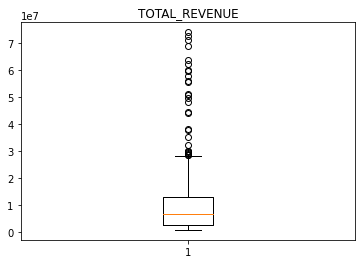

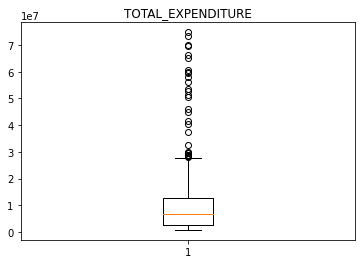

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
data2 = data.dropna()
#data["TOTAL_REVENUE"].isnull().sum()
#data["TOTAL_REVENUE"].unique()
plt.boxplot(data2["TOTAL_REVENUE"])
plt.title("TOTAL_REVENUE")
plt.show()
plt.boxplot(data2["TOTAL_EXPENDITURE"])
plt.title("TOTAL_EXPENDITURE")
plt.show()

12987818.0 2759076.5 10228741.5
12987818.0


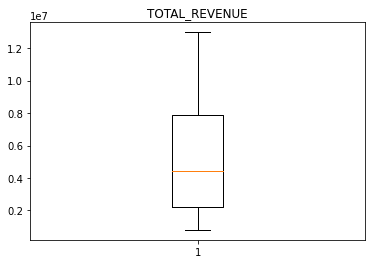

In [81]:
#Total revenueyi aykırı değerleri siliyorum aşağıda
data2= data.dropna()
q75, q25 = np.percentile(data2["TOTAL_REVENUE"], [75 ,25])
I = q75 - q25
std_sapma = data2["TOTAL_REVENUE"].std()
print(q75,q25,I)
#min_deger = q25 - (I*std_sapma)
maks_deger = q75 
print(maks_deger)
#outlier değerler max ustunde max değere göre filtreleme yapıp atabiliriz.

#data2["TOTAL_REVENUE"].shape
data2 = data2[~(data2["TOTAL_REVENUE"] > maks_deger)]

plt.boxplot(data2["TOTAL_REVENUE"])
plt.title("TOTAL_REVENUE")
plt.show()


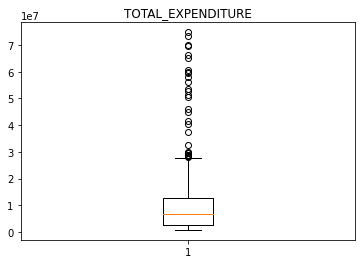

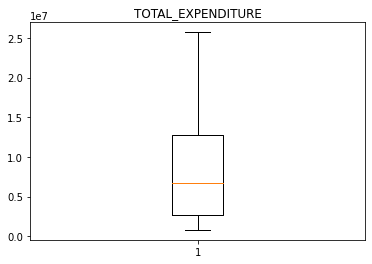

In [86]:
#TOTAL_EXPENDITURE i winsorization
data3 = data.dropna()
plt.boxplot(data3["TOTAL_EXPENDITURE"])
plt.title("TOTAL_EXPENDITURE")
plt.show()
#ust tarafta outlierlar olduğundan bu tarafta winsorization yapalım.
from scipy.stats.mstats import winsorize

winsorize_totalexpenditure = winsorize(data3["TOTAL_EXPENDITURE"], (0, 0.10))

#winsorize_totalexpenditure
plt.boxplot(winsorize_totalexpenditure)
plt.title("TOTAL_EXPENDITURE")
plt.show()

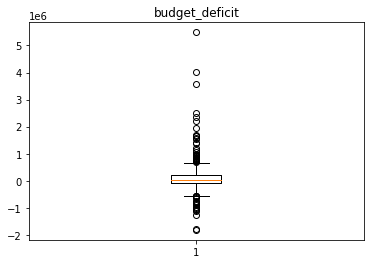

<ipython-input-112-2ef8784963bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['budget_deficit'] = (data4['TOTAL_EXPENDITURE'] - data4['TOTAL_REVENUE'])


In [112]:
data4 = data.dropna()
budget_deficit = data4["TOTAL_EXPENDITURE"] - data4["TOTAL_REVENUE"]
plt.boxplot(budget_deficit)
plt.title("budget_deficit")
plt.show()
data4['budget_deficit'] = (data4['TOTAL_EXPENDITURE'] - data4['TOTAL_REVENUE'])
#aykırı değerler alt ve üstte var.

In [114]:
q75, q25 = np.percentile(data4["budget_deficit"], [75 ,25])
data4 = data4[~((data4["budget_deficit"] > q75) | (data4["budget_deficit"] < q25)) ]

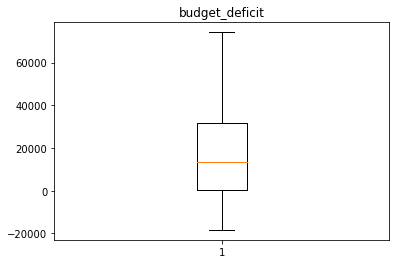

In [115]:
plt.boxplot(data4["budget_deficit"])
plt.title("budget_deficit")
plt.show()

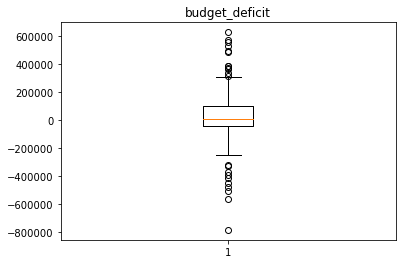

In [127]:
#bu sefer önce aykırı değerleri silip ardından bu değişkeni yaratalım
#Total revenueyi aykırı değerleri siliyorum aşağıda
data2= data.dropna()
q75, q25 = np.percentile(data2["TOTAL_REVENUE"], [75 ,25])
maks_deger = q75 
data2 = data2[~(data2["TOTAL_REVENUE"] > maks_deger)]
q75, q25 = np.percentile(data2["TOTAL_EXPENDITURE"], [75 ,25])
maks_deger2 = q75 
data2 = data2[~(data2["TOTAL_EXPENDITURE"] > maks_deger2)]
data2['budget_deficit'] = (data2['TOTAL_EXPENDITURE'] - data2['TOTAL_REVENUE'])

plt.boxplot(data2['budget_deficit'])
plt.title("budget_deficit")
plt.show()

#aykırı değerlerin olduu görüldü.

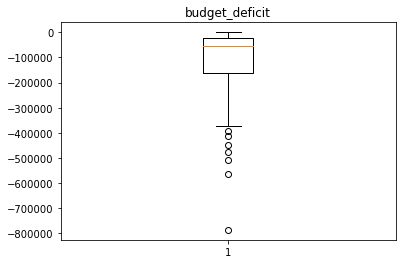

In [130]:
#şimdi bunları kaldıralım. 
#sadece üst outlierlar kaldırıldı.

q75, q25 = np.percentile(data2['budget_deficit'], [75 ,25])
maks_deger3 = q75 
data2 = data2[~(data2['budget_deficit'] > maks_deger3)]
plt.boxplot(data2['budget_deficit'])
plt.title("budget_deficit")
plt.show()

In [ ]:
#ilk değişkeni yaratıp ardından outlierlara bakıp silme yapardım.
#ikisinin birbirinden farklı olduğunu gördüm.